In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

import os

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
url = 'https://raw.githubusercontent.com/ala-ism/AI_Program_Template/master/Tree_Classificiation.csv'
df = pd.read_csv(url)

df.head()

trunc.length  trunc.width  branch.length  branch.width                tree
0           5.1          3.5            1.4           0.2  alloxylon flammeum
1           4.9          3.0            1.4           0.2  alloxylon flammeum
2           4.7          3.2            1.3           0.2  alloxylon flammeum
3           4.6          3.1            1.5           0.2  alloxylon flammeum
4           5.0          3.6            1.4           0.2  alloxylon flammeum

In [5]:
if 'Id' in df.columns:
  df.__delitem__('Id')

df.head()

trunc.length  trunc.width  branch.length  branch.width                tree
0           5.1          3.5            1.4           0.2  alloxylon flammeum
1           4.9          3.0            1.4           0.2  alloxylon flammeum
2           4.7          3.2            1.3           0.2  alloxylon flammeum
3           4.6          3.1            1.5           0.2  alloxylon flammeum
4           5.0          3.6            1.4           0.2  alloxylon flammeum

In [6]:
#SUMMARY OF THE DATA SET
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
trunc.length     150 non-null float64
trunc.width      150 non-null float64
branch.length    150 non-null float64
branch.width     150 non-null float64
tree             150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df['tree'].unique()

array(['alloxylon flammeum', 'angophora costata', 'Southern silky oak'],
      dtype=object)

listOfNumericalColumns : ['trunc.length', 'trunc.width', 'branch.length', 'branch.width']
spices : ['alloxylon flammeum' 'angophora costata' 'Southern silky oak']
trunc.length  :  alloxylon flammeum
trunc.length  :  angophora costata
trunc.length  :  Southern silky oak
trunc.width  :  alloxylon flammeum
trunc.width  :  angophora costata
trunc.width  :  Southern silky oak
branch.length  :  alloxylon flammeum
branch.length  :  angophora costata
branch.length  :  Southern silky oak
branch.width  :  alloxylon flammeum
branch.width  :  angophora costata
branch.width  :  Southern silky oak


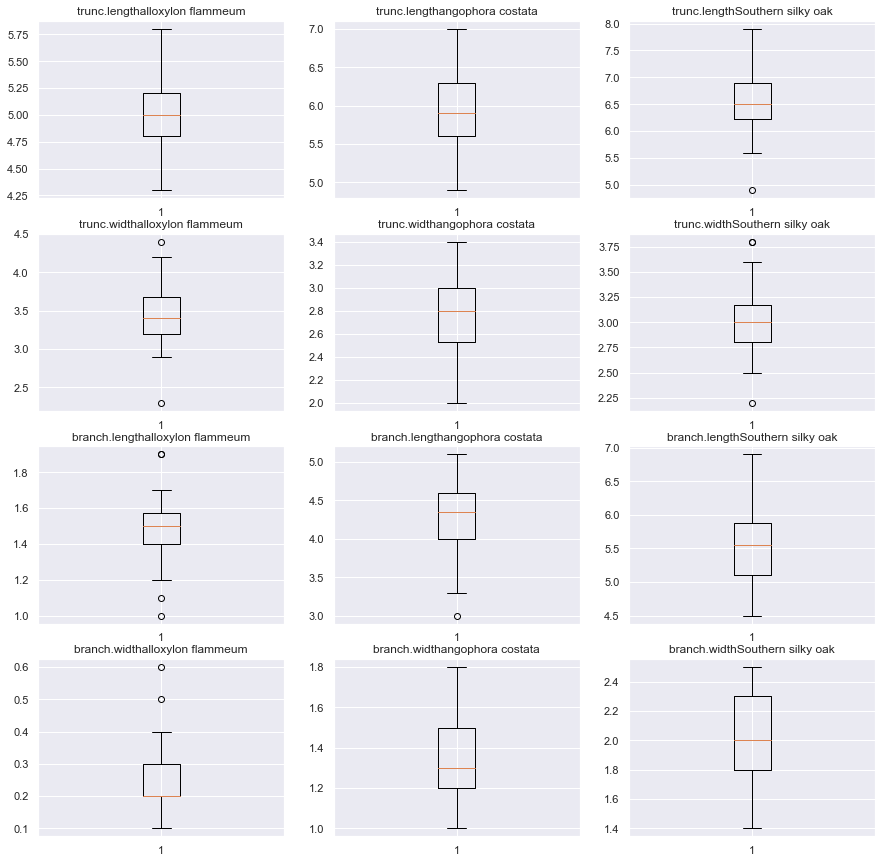

In [9]:
# COMPARING THE DIFFERENT NUMERICAL COLUMNS IN THE GIVEN DATASET 

df.describe()

listOfColumns = df.columns
listOfNumericalColumns = []

for column in listOfColumns:
    if df[column].dtype == float64:
        listOfNumericalColumns.append(column)

print('listOfNumericalColumns :',listOfNumericalColumns)
spices = df['tree'].unique()
print('spices :',spices)

fig, axs = plt.subplots(nrows=len(listOfNumericalColumns),ncols=len(spices),figsize=(15,15))

for i in range(len(listOfNumericalColumns)):
    for j in range(len(spices)):  
        print(listOfNumericalColumns[i]," : ",spices[j])
        axs[i,j].boxplot(df[listOfNumericalColumns[i]][df['tree']==spices[j]])
        axs[i,j].set_title(listOfNumericalColumns[i]+""+spices[j])  

In [10]:
#descriptions
df.describe()

trunc.length  trunc.width  branch.length  branch.width
count    150.000000   150.000000     150.000000    150.000000
mean       5.843333     3.057333       3.758000      1.199333
std        0.828066     0.435866       1.765298      0.762238
min        4.300000     2.000000       1.000000      0.100000
25%        5.100000     2.800000       1.600000      0.300000
50%        5.800000     3.000000       4.350000      1.300000
75%        6.400000     3.300000       5.100000      1.800000
max        7.900000     4.400000       6.900000      2.500000

In [11]:
df.groupby('tree').size()

tree
Southern silky oak    50
alloxylon flammeum    50
angophora costata     50
dtype: int64

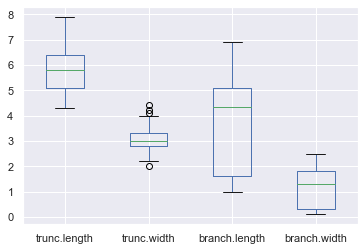

In [12]:
#box and whisker plots for different numerical columns
df.plot(kind='box')

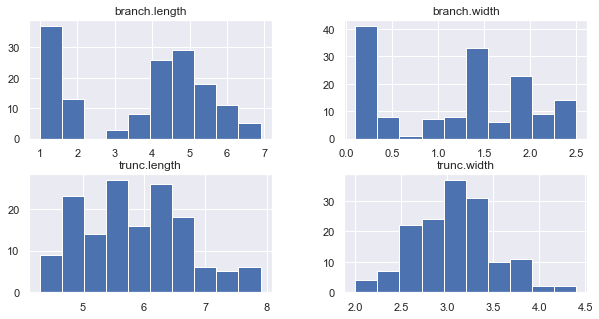

In [13]:
#HIST PLOT OF ALL NUMERICAL COLUMNS

df.hist(figsize=(10,5))
plt.show()

HIST PLOT OF INDIVIDUAL trees
['alloxylon flammeum' 'angophora costata' 'Southern silky oak']


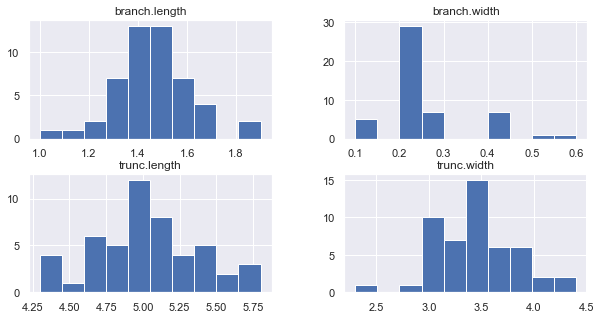

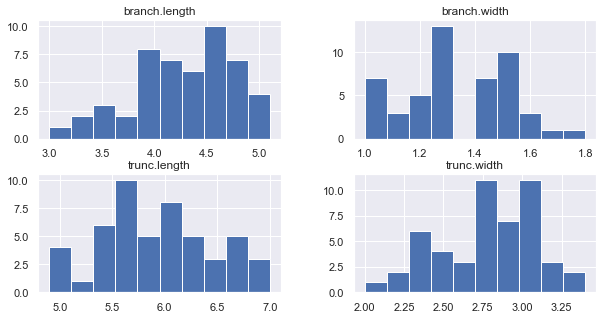

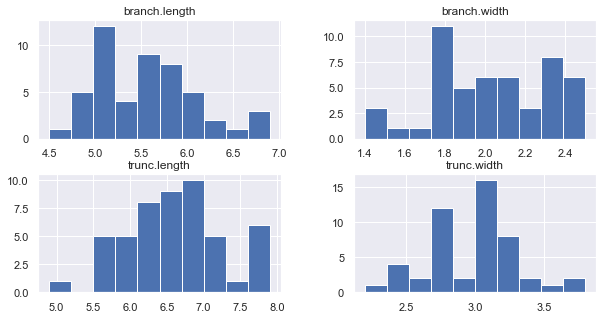

In [14]:
print("HIST PLOT OF INDIVIDUAL trees")
print(spices)

for spice in spices:
        df[df['tree']==spice].hist(figsize=(10,5))  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D44C4011D0>,
      dtype=object)

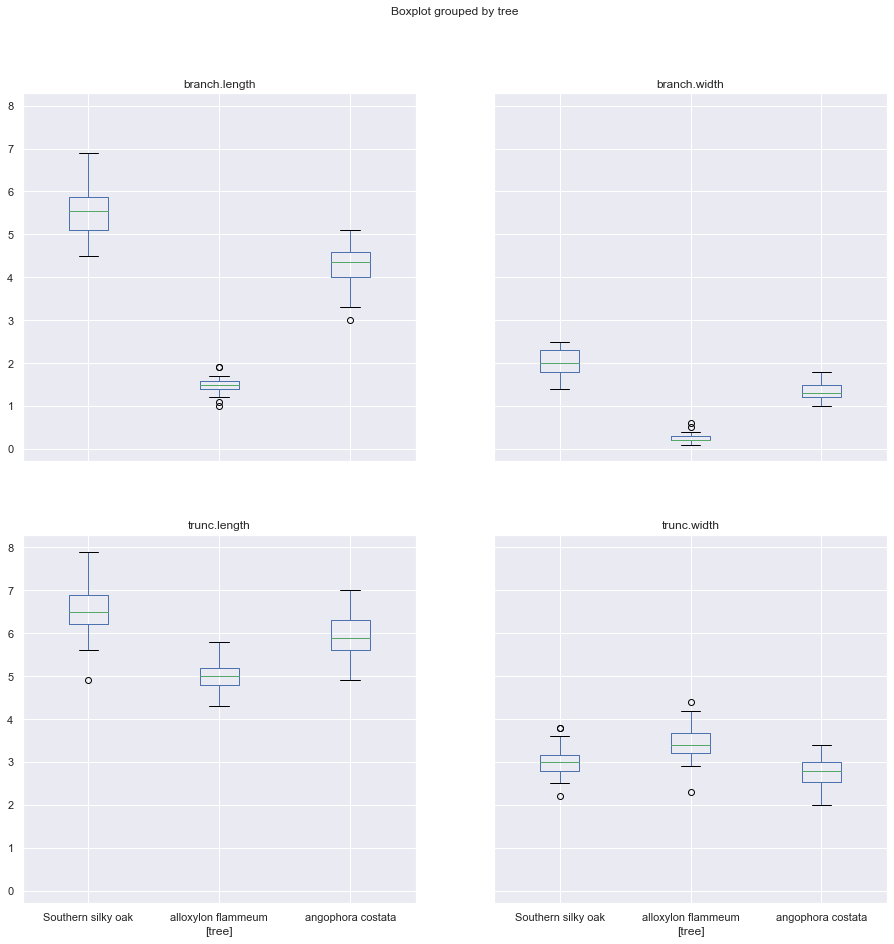

In [15]:
df.boxplot(by='tree',figsize=(15,15))

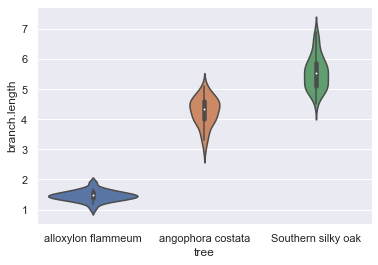

In [16]:
sns.violinplot(data=df,x='tree',y='branch.length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D44C1E1978>,
      dtype=object)

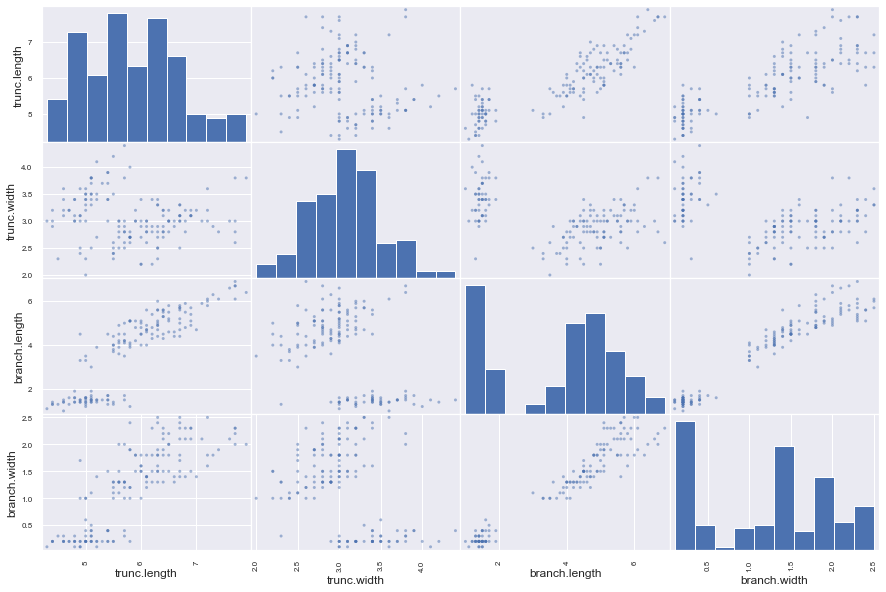

In [17]:
pd.plotting.scatter_matrix(df,figsize=(15,10))

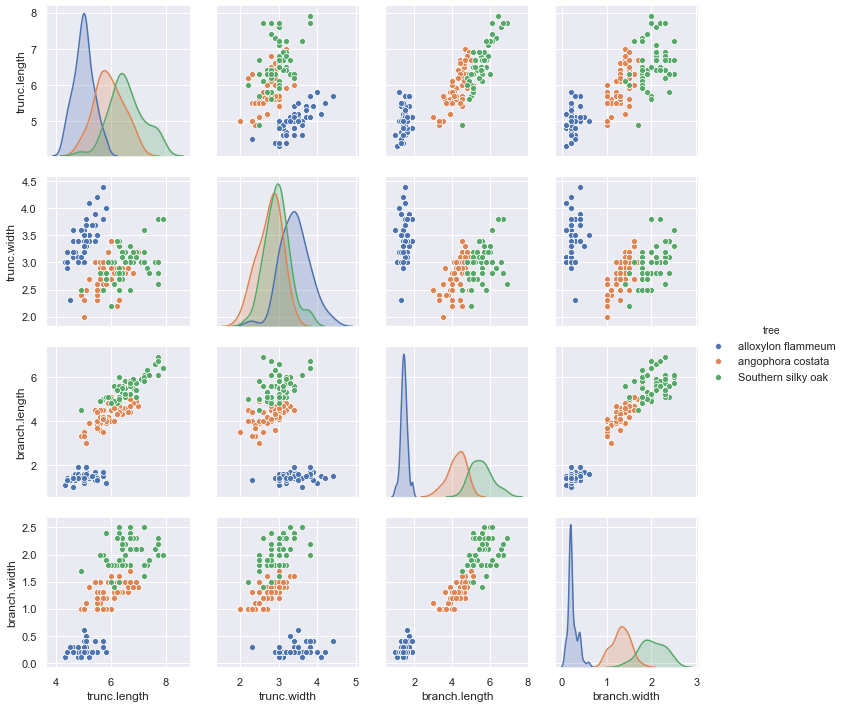

In [18]:
sns.pairplot(df,hue="tree")

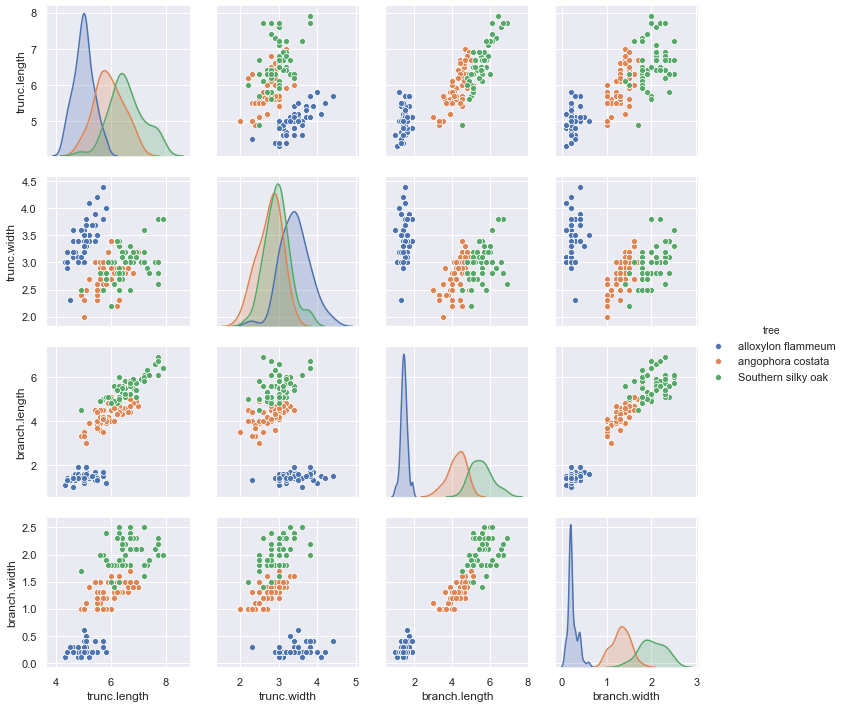

In [19]:
sns.pairplot(df,diag_kind='kde',hue='tree')

## APPLYING DIFFERENT CLASSIFICATION MODELS

In [20]:
#Importing Metrics for Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [21]:
# SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES ( X, Y )
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [26]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [27]:
from sklearn.metrics import accuracy_score

def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))

In [28]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
generateClassificationReport(y_test,y_pred)

                    precision    recall  f1-score   support

Southern silky oak       0.86      1.00      0.92         6
alloxylon flammeum       1.00      1.00      1.00        11
 angophora costata       1.00      0.92      0.96        13

          accuracy                           0.97        30
         macro avg       0.95      0.97      0.96        30
      weighted avg       0.97      0.97      0.97        30

[[ 6  0  0]
 [ 0 11  0]
 [ 1  0 12]]
accuracy is  0.9666666666666667


C:\Users\Ismaïl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ismaïl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
generateClassificationReport(y_test,y_pred)

                    precision    recall  f1-score   support

Southern silky oak       1.00      0.83      0.91         6
alloxylon flammeum       1.00      1.00      1.00        11
 angophora costata       0.93      1.00      0.96        13

          accuracy                           0.97        30
         macro avg       0.98      0.94      0.96        30
      weighted avg       0.97      0.97      0.97        30

[[ 5  0  1]
 [ 0 11  0]
 [ 0  0 13]]
accuracy is  0.9666666666666667


In [30]:
#SUPPORT VECTOR MACHINE'S
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
generateClassificationReport(y_test,y_pred)

                    precision    recall  f1-score   support

Southern silky oak       1.00      1.00      1.00         6
alloxylon flammeum       1.00      1.00      1.00        11
 angophora costata       1.00      1.00      1.00        13

          accuracy                           1.00        30
         macro avg       1.00      1.00      1.00        30
      weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]
accuracy is  1.0


C:\Users\Ismaïl\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
#K-NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

generateClassificationReport(y_test,y_pred)

                    precision    recall  f1-score   support

Southern silky oak       1.00      1.00      1.00         6
alloxylon flammeum       1.00      1.00      1.00        11
 angophora costata       1.00      1.00      1.00        13

          accuracy                           1.00        30
         macro avg       1.00      1.00      1.00        30
      weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]
accuracy is  1.0


In [32]:
#DECISION TREE 
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

generateClassificationReport(y_test,y_pred)

                    precision    recall  f1-score   support

Southern silky oak       1.00      1.00      1.00         6
alloxylon flammeum       1.00      1.00      1.00        11
 angophora costata       1.00      1.00      1.00        13

          accuracy                           1.00        30
         macro avg       1.00      1.00      1.00        30
      weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]
accuracy is  1.0
